# Line Chat Bot Record Expenses
##### Mr.Jakkrit Sonsanit

***

### Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from firebase import firebase
import Model

### Create New DataFrame

In [2]:
# dfe = pd.DataFrame({
#     'date':[],
#     'text':[],
#     'money':[],
#     'cate':[]
# })

## EXPENSES
***

### Load Dataframe

In [3]:
dfe = pd.read_csv('Data/Expenses.csv')
dfe.tail()

,date,text,money,cate
470,2020-01-21,ข้าวเที่ยง,35.0,Food
471,2020-01-21,ค่าโทรศัพท์,294.0,Bill
472,2020-01-21,ติ๋มซำ,63.0,Food
473,2020-01-21,ชานม,35.0,Food
474,2020-01-21,ค่ารถตู้,40.0,Transportation


### Connect Firebase

In [4]:
authentication = firebase.FirebaseAuthentication('wI4pPnsc1m2Ei7E3Q3drORPWtDBo927IxwBsA6ZH', 'palm8ikaa2@gmail.com', extra={'id': 123})
firebase_data = firebase.FirebaseApplication('https://line-bot-chrins.firebaseio.com/', authentication=authentication)

### Query Expenses from firebase

In [5]:
result = firebase_data.get('/expenses', None)

### Append new expenses in temporary dataframe

In [6]:
tmp = list()
tmp_df = pd.DataFrame({
    'date':[],
    'text':[],
    'money':[]
})
old_numlist = len(dfe)
for k, v in result.items():
    tmp.append(v)
for i in range(len(tmp)):
    if i >= old_numlist:
        tmp_df = tmp_df.append(tmp[i], ignore_index=True)
tmp_df.date = pd.to_datetime(tmp_df.date)
tmp_df

,date,text,money
0,2020-01-22,ค่าอินเตอร์เน็ต,631.3
1,2020-01-22,ข้าวเย็น,40.0
2,2020-01-22,ชา,20.0
3,2020-01-22,นม,10.0
4,2020-01-23,นม,10.0
5,2020-01-23,ข้าวเย็น,35.0
6,2020-01-23,น้ำ,19.0
7,2020-01-23,ไส้กรอก,20.0
8,2020-01-25,นม,10.0
9,2020-01-25,ข้าวเย็น,60.0


### Append expenses on day in dataframe

In [7]:
# for k, v in result.items():
#     if v['date'] == '6/9/2019':
#         dfe = dfe.append(v, ignore_index=True)
# dfe.date = pd.to_datetime(dfe.date)
# dfe.head()

### Append all expenses to dataframe

In [8]:
# for k, v in result.items():
#     dfe = dfe.append(v, ignore_index=True)
# dfe.date = pd.to_datetime(dfe.date)
# dfe.head()

### Use model to classify category

In [9]:
corpus, model = Model.train()
BOW = Model.createBOW(tmp_df.text, corpus)
cate = model.predict(BOW)

In [10]:
tmp_df['cate'] = cate

dfe = pd.concat([dfe,tmp_df], ignore_index=True)
dfe.date = pd.to_datetime(dfe.date)
dfe.tail(20)

,date,text,money,cate
475,2020-01-22,ค่าอินเตอร์เน็ต,631.3,Transportation
476,2020-01-22,ข้าวเย็น,40.0,Food
477,2020-01-22,ชา,20.0,Food
478,2020-01-22,นม,10.0,Food
479,2020-01-23,นม,10.0,Food
480,2020-01-23,ข้าวเย็น,35.0,Food
481,2020-01-23,น้ำ,19.0,Food
482,2020-01-23,ไส้กรอก,20.0,Food
483,2020-01-25,นม,10.0,Food
484,2020-01-25,ข้าวเย็น,60.0,Food


### Change category

In [12]:
t = ['Entertainment', 'Transportation', 'Shopping', 'Food', 'Bill', 'Other']
n = 490
dfe.at[n, 'cate'] = t[1]
dfe.iloc[n:]

,date,text,money,cate
490,2020-01-25,รถเมล์,12.0,Transportation
491,2020-01-25,กาแฟ,50.0,Food
492,2020-01-25,ดูหนัง,130.0,Entertainment
493,2020-01-25,ค่าarl,100.0,Transportation
494,2020-01-25,ซื้อของใช้,421.0,Shopping


### Save to csv

In [13]:
dfe.to_csv('Data/Expenses.csv', index=False)

## INCOME
***

### Create DataFrame

In [14]:
# dfi = pd.DataFrame({
#     'date':[],
#     'text':[],
#     'money':[],
# })

### Load DataFrame

In [15]:
dfi = pd.read_csv('Data/income.csv')

### Query income from firebase

In [16]:
result = firebase_data.get('/income', None)

### Append new income 

In [17]:
tmp = list()
old_numlist = len(dfi)
for k, v in result.items():
    tmp.append(v)
for i in range(len(tmp)):
    if i >= old_numlist:
        dfi = dfi.append(tmp[i], ignore_index=True)
dfi.date = pd.to_datetime(dfi.date)
dfi.tail()

,date,text,money
6,2019-12-10,ได้เงิน,1000.00
7,2019-12-14,ได้เงิน,2000.00
8,2019-12-17,ได้เงิน,2000.00
9,2019-12-19,เติมเงินโทรศัพท์,50.00
10,2020-01-06,ได้เงิน,12887.47


### Save to csv

In [18]:
dfi.to_csv('Data/income.csv', index=False)

## Summary 
***

### Balance

In [19]:
print("Balance : %.2f Bath" %(sum(dfi.money)-sum(dfe.money)))

Balance : 3181.90 Bath


### Set month

In [20]:
m = 12

dfim = dfi[dfi.date.dt.month == m]
dfem = dfe[dfe.date.dt.month == m]

### Total Incom and Expenses 

In [21]:
print("Total Income :", sum(dfim.money), 'Bath')
print("Total Expenses :", sum(dfem.money), 'Baht')

Total Income : 19050.0 Bath
Total Expenses : 18497.5 Baht


### Total Expenses in day

In [23]:
d = "2019-"+str(m)+"-"+(input("Day :") or str(1))
print("Total Expenses in", d, ":", sum(dfem[dfem.date == d]['money']), 'Baht')
dfem[dfem.date == d]

Day :7
Total Expenses in 2019-12-7 : 223.0 Baht


,date,text,money,cate
333,2019-12-07,ข้าวเที่ยง,35.0,Food
334,2019-12-07,ขนม,42.0,Food
335,2019-12-07,ซูซิ,40.0,Food
336,2019-12-07,กาแฟ,86.0,Food
337,2019-12-07,ชานม,20.0,Food


### Total Expenses in each category

In [26]:
dfem.groupby(['cate']).sum()

,money
cate,
Bill,5165.0
Entertainment,1540.0
Food,1184.0
Other,30.0


### Expenses in each category

In [27]:
ls = ['1.Food', '2.Entertainment', '3.Bill', '4.Saving', '5.Shopping', '6.Transportation', '7.Other']
print(*ls)
dfem[dfem.cate == ls[int(input('Enter number of category ') or 2)-1][2:]]

1.Food 2.Entertainment 3.Bill 4.Saving 5.Shopping 6.Transportation 7.Other
Enter number of category 1


,date,text,money,cate
303,2019-12-01,ข้าวเที่ยง,35.0,Food
304,2019-12-01,น้ำ,45.0,Food
305,2019-12-01,ข้าวเย็น,40.0,Food
306,2019-12-01,ขนม,37.0,Food
307,2019-12-01,ขนม,20.0,Food
309,2019-12-02,น้ำ,10.0,Food
310,2019-12-02,ข้าวเที่ยง,35.0,Food
312,2019-12-02,ข้าวเย็น,75.0,Food
313,2019-12-02,ขนม,27.0,Food
315,2019-12-02,ขนม,30.0,Food


### Total in each day

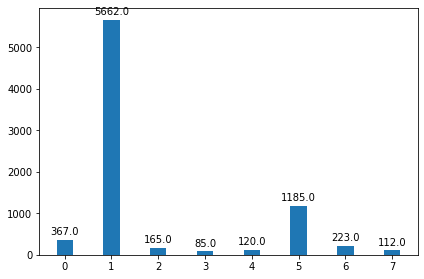

In [28]:
tmp = dfem.groupby(dfem.date.dt.day).sum()

x = np.arange(len(tmp))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x, tmp['money'], width)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
        
fig.tight_layout()
plt.show()

### Expenses ratio in each category

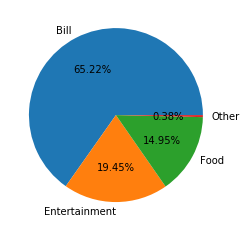

In [29]:
tmp = dfem.groupby(['cate']).sum()
tmp = tmp.reset_index()
plt.pie(tmp.money, labels=tmp.cate, autopct=lambda x: '{:.2f}%'.format(x));

### Total Expenses in each month 

In [30]:
tmp = dfe.rename(columns={"date": "Month", "money":"Money"})
tmp.groupby(tmp.Month.dt.month).sum()

,Money
Month,
10,15090.77
11,16028.00
12,7919.00


### Total expenses in each month

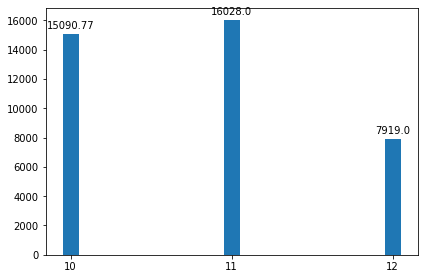

In [31]:
tmp = dfe.groupby(dfe.date.dt.month).sum()
tmp = tmp.reset_index()
tmp.date = tmp.date.astype(str)

x = tmp.date
width = .1 # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x, tmp['money'], width)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
        
fig.tight_layout()
plt.show()